---
Tom Curran

Problem set \#7 

March 5, 2018

---

Classifier “horse” race (10 points). For this problem, you will use the 397 observationsfromtheAuto.csvdataset.1 Thisdatasetincludes397observations on miles per gallon (mpg), number of cylinders (cylinders), engine displace- ment (displacement), horsepower (horsepower), vehicle weight (weight), ac- celeration (acceleration), vehicle year (year), vehicle origin (origin), and vehicle name (name). We will study the factors that make miles per gallon high or low. Create a binary variable mpg high that equals 1 if mpg high≥ median(mpg high) and equals either 0 if mpg high< median(mpg high).

---

(a) Use sklearn.linear model.LogisticRegression to fit a logistic model of mpg high on features number of cylinders (cyl), engine displacement (dspl), horsepower (hpwr), vehicle weight (wgt), acceleration (accl), vehi- cle year (yr), vehicle origin (orgn). Make sure to include a constant term. Fit the model using k-fold cross validation with k = 4 folds.2
Report the MSE of the model as the average MSE across the k = 4 test sets, and report the error rates for each category of mpg high as the average error rate for that category across the k = 4 test sets.

$$ Pr(mpg_high = 1 | X \beta) =\frac{e^{X\beta}}{1 + e^{X\beta}} $$

where 
$$X\beta = \beta_0 + \beta_1cyl_i + \beta_2dspl_i + \beta_3hpwr_i + \beta_4wgt_i + \beta_5accl_i+ \beta_6yr_i + \beta_7orgn_i$$


In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
%matplotlib inline
df = pd.read_csv("Auto.csv", na_values='?')

/Users/thomascurran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data cleanup

df.isnull().sum()




mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [3]:
df = df.dropna()

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.insert(len(df.columns), 'constant', 1)

In [7]:
df['mpg_high'] = df.mpg.apply(lambda x: 1 if x>= df.mpg.median() else 0)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,constant,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0


In [9]:
y = np.array(df['mpg_high'])

x = np.array(df[['cylinders','displacement','horsepower', 'weight','acceleration','year', 'origin']])

In [10]:
k =4

kf = KFold(n_splits = k, shuffle = True, random_state = 15)

kf.get_n_splits(x)

mse = np.zeros(k)

In [23]:
#begin logistic regression with k = 4 folds
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, precision_recall_fscore_support

yval_test = np.zeros(x.shape[0])

yval_pred = np.zeros(x.shape[0])

k_index = 0

mse1 = np.zeros(k)

mse0 = np.zeros(k)

for train_index, test_index in kf.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    logreg = LogisticRegression()
    
    logreg.fit(xtrain, ytrain)
    
    yhat = logreg.predict(xtest)
    
    yval_test[test_index] = ytest
    
    yval_pred[test_index] = yhat
    
    mse[k_index] = mean_squared_error(ytest, yhat)
        #print(accuracy_score(ytest, yhat))
    prec = precision_recall_fscore_support(ytest, yhat)
    
    zero_errorRate = 1 - prec[0][0]
    one_errorRate = 1 - prec[0][1]
    
    mse1[k_index] = one_errorRate
    mse0[k_index] = zero_errorRate

    print("------------------------------------------------------------------------------")
    print("Mean Squared Error:", str(round(mse[k_index],4)*100)+'%')
    print("Error Rate for 0:  ",  str(round(zero_errorRate,4)*100)+'%')
    print("Error Rate for 1:  ",str(round(one_errorRate,4)*100)+'%')
    
    print("")
    print("Classification Report for K =", k_index+1,":")
    print(classification_report(ytest, yhat))
    print("")
    


    k_index += 1
    
    
print("----------------------------------------------------------------------------------")
print("Total Error Rates")
print("Mean Squared Error:                   ", str(round(mse.mean(),4)*100)+'%')
print("Mean Squared Error Standard Deviation:", str(round(mse.std(),5)))
print("Error Rate for 0:                     ", str(round(zero_errorRate.mean(),4)*100)+'%')
print("Error Rate for 1:                     ", str(round(one_errorRate.mean(),4)*100)+'%')

------------------------------------------------------------------------------
Mean Squared Error: 9.18%
Error Rate for 0:   5.77%
Error Rate for 1:   13.04%

Classification Report for K = 1 :
             precision    recall  f1-score   support

          0       0.94      0.89      0.92        55
          1       0.87      0.93      0.90        43

avg / total       0.91      0.91      0.91        98


------------------------------------------------------------------------------
Mean Squared Error: 10.2%
Error Rate for 0:   12.24%
Error Rate for 1:   8.16%

Classification Report for K = 2 :
             precision    recall  f1-score   support

          0       0.88      0.91      0.90        47
          1       0.92      0.88      0.90        51

avg / total       0.90      0.90      0.90        98


------------------------------------------------------------------------------
Mean Squared Error: 13.27%
Error Rate for 0:   15.22%
Error Rate for 1:   11.54%

Classification Report

---

b) Use sklearn.ensemble.RandomForestClassifier to fit a random for- est model of mpg high on max features=2 out of the seven possible fea- tures used in part (a). Set n estimators=20, set bootstrap=True, set oob score=True, and set random state=25. Report the MSE of the ran- dom forest model as the MSE from the .oob prediction object, and re- port the error rates for each category of mpg high from the .oob prediction object.

---

In [12]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [13]:
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=10, 
                                        criterion=’gini’, 
                                        max_depth=None, 
                                        min_samples_split=2, 
                                        min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0,
                                        max_features=’auto’, 
                                        max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None, 
                                        bootstrap=True, 
                                        oob_score=False, 
                                        n_jobs=1, 
                                        random_state=None, 
                                        verbose=0, 
                                        warm_start=False, class_weight=None)


'''

rf = RandomForestClassifier(n_estimators = 20, 
                           max_features = 2, 
                           bootstrap = True, 
                           oob_score = True, 
                           random_state = 25
                          )

rf.fit(x,y)

yhat = rf.oob_decision_function_

In [14]:
pred = pd.DataFrame(yhat).rename(columns = {0:'zero', 1:'one'})

pred['y'] = y

pred['oob_prediction'] = pred.one.apply(lambda x: 1 if x >= .5 else 0)

total_mse = mean_squared_error(pred.y, pred.oob_prediction)

mse_zero = pred[pred['oob_prediction'] == 0]
mse_zero_val = mean_squared_error(mse_zero.y, mse_zero.oob_prediction)

mse_one = pred[pred['oob_prediction'] == 1]
mse_one_val = mean_squared_error(mse_one.y, mse_one.oob_prediction)

print("Category Zero MSE: ",str(round(mse_zero_val, 5)*100) + '%')
print("Category One MSE:  ", str(round(mse_one_val, 5)*100) + '%')
print("------------------------------------------------------------------------------")
print("Totale MSE:        ",str(round(total_mse, 5)*100) + '%')

Category Zero MSE:  5.789%
Category One MSE:   8.416%
------------------------------------------------------------------------------
Totale MSE:         7.143%


In [33]:
rf_reg = RandomForestRegressor(n_estimators = 20, 
                                   max_features = 2, 
                                   bootstrap = True, 
                                   oob_score = True, 
                                   random_state = 25
                                  )
rf_reg.fit(x,y)

rf_reg.score(x,y)

yhat_rfreg = rf_reg.oob_prediction_
mse_reg = mean_squared_error(y, yhat_rfreg)

print("Mean Squared Error for Random Forest Regressor: " + str(mse_reg))
print("OOB Prediction Accuracy Score:"+str(rf_reg.oob_score_) )

Mean Squared Error for Random Forest Regressor: 0.0582693449267
OOB Prediction Accuracy Score:0.766922620293


---
c) Use sklearn.svm.SVC to fit a support vector machines model of mpg high with a Gaussian radial basis function kernel kernel=’rbf’ on the seven features used in part (a). Set the penalty parameter to C=1 and set gamma=0.2. Fit the model using k-fold cross validation with k = 4 folds exactly as in part (a).

In [34]:
from sklearn import svm

k =4

kf_svm = KFold(n_splits = k, shuffle = True, random_state = 15)

kf.get_n_splits(x)

mse_svm = np.zeros(k)


In [35]:
yval_test = np.zeros(x.shape[0])

yval_pred = np.zeros(x.shape[0])

k_index = 0

mse1_svm = np.zeros(k)

mse0_svm = np.zeros(k)

for train_index, test_index in kf_svm.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    clf = svm.SVC(kernel = 'rbf', C=1, gamma = .2)
    
    clf.fit(xtrain, ytrain)
    
    yhat = clf.predict(xtest)

    yval_test[test_index] = ytest
    
    yval_pred[test_index] = yhat
    
    mse_svm[k_index] = mean_squared_error(ytest, yhat)
    prec = precision_recall_fscore_support(ytest, yhat)
    
    zero_errorRate_svm = 1 - prec[0][0]
    one_errorRate_svm = 1 - prec[0][1]
    
    mse1_svm[k_index] = one_errorRate
    mse0_svm[k_index] = zero_errorRate

    print("------------------------------------------------------------------------------")
    print("Mean Squared Error:", str(round(mse_svm[k_index],4)*100)+'%')
    print("Error Rate for 0:  ",  str(round(zero_errorRate_svm,4)*100)+'%')
    print("Error Rate for 1:  ",str(round(one_errorRate_svm,4)*100)+'%')
    
    print("")
    print("Classification Report for K =", k_index+1,":")
    print(classification_report(ytest, yhat))
    print("")
    
    
    k_index += 1

print("------------------------------------------------------------------------------")
print("Total Mean Squared Error:", str(round(mse_svm.mean(),4)*100)+'%')
print("Total Mean Squared Error Standard Deviation:", str(round(mse_svm.std(),4)))
print("Error Rate for 0:  ",  str(round(mse1_svm.mean(),4)*100)+'%')
print("Error Rate for 1:  ",str(round(mse0_svm.mean(),4)*100)+'%')

------------------------------------------------------------------------------
Mean Squared Error: 54.08%
Error Rate for 0:   0.0%
Error Rate for 1:   55.21%

Classification Report for K = 1 :
             precision    recall  f1-score   support

          0       1.00      0.04      0.07        55
          1       0.45      1.00      0.62        43

avg / total       0.76      0.46      0.31        98


------------------------------------------------------------------------------
Mean Squared Error: 52.04%
Error Rate for 0:   52.04%
Error Rate for 1:   100.0%

Classification Report for K = 2 :
             precision    recall  f1-score   support

          0       0.48      1.00      0.65        47
          1       0.00      0.00      0.00        51

avg / total       0.23      0.48      0.31        98


------------------------------------------------------------------------------
Mean Squared Error: 52.04%
Error Rate for 0:   53.12%
Error Rate for 1:   0.0%

Classification Report

/Users/thomascurran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---
(d) Which of the above three models do you think is the best predictor of mpg high? Why?

In [17]:
model_eval = pd.DataFrame({"Value":['mse', 'mse 0', 'mse 1'],
                          "Logit":[mse.mean(), zero_errorRate.mean(), one_errorRate.mean()],
                          "Random_Forest":[total_mse, mse_zero_val, mse_one_val],
                          "SVM":[0,0,0]})

In [18]:
models = pd.DataFrame({'model':['Logit','Logit','Logit', 'Random Forest', 'Random Forest','Random Forest', "SVM", "SVM", "SVM"]})

models['Variable'] = ['Total MSE', 'MSE 1', 'MSE 0', 'Total MSE', 'MSE 1', 'MSE 0','Total MSE', 'MSE 1', 'MSE 0']

models['Values'] = [mse.mean(), 
                    one_errorRate.mean(),
                    zero_errorRate.mean(),
                    total_mse, 
                    mse_one_val, 
                    mse_zero_val,
                    mse_svm.mean(),
                    mse1_svm.mean(), 
                    mse0_svm.mean()]
models

,model,Variable,Values
0,Logit,Total MSE,0.107143
1,Logit,MSE 1,0.145455
2,Logit,MSE 0,0.046512
3,Random Forest,Total MSE,0.071429
4,Random Forest,MSE 1,0.084158
5,Random Forest,MSE 0,0.057895
6,SVM,Total MSE,0.507653
7,SVM,MSE 1,0.145455
8,SVM,MSE 0,0.046512


/Users/thomascurran/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


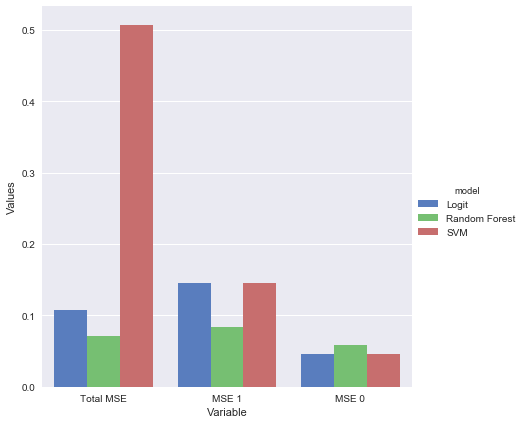

In [19]:
import seaborn as sns
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Variable", y="Values", hue="model", data=models,
                   size=6, kind="bar", palette="muted")

Using the MSE for the models, we can see that Random Forest had the lowest mean squared error, suggesting that it was the lowest of the three models. Though, it was not the lowest MSE when predicting non-high mpg cars. The second best model is the logit, showing significantly lower MSE for total mse. The worst at predicting the outcome is the SVM showing a very high error rate for predicting outcomes, especially when compared to Logit and Random Forest outcomes. 